In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
import os
import sys

from importlib import reload
import src.utils.utils
reload(src.utils.utils)
from src.utils.utils import top_n_by_interval, top_n_total_revenue, top_n_average_rating

In [2]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [3]:
## Load the data

with open(pickle_folder + 'movies_clean.p', 'rb') as f:
    movie_data = pickle.load(f)

with open(pickle_folder + 'characters_clean.p', 'rb') as f:
    character_data = pickle.load(f)

In [4]:
movie_data

,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Year,Year_Interval,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes
0,3217,Army of Darkness,21502796.0,1992,1975-1995,12,True,True,False,False,...,False,False,False,False,False,False,False,True,7.4,197717.0
1,3333,The Birth of a Nation,50000000.0,1915,1915-1935,7,False,False,False,False,...,False,False,False,False,False,False,False,True,6.1,26681.0
2,3746,Blade Runner,33139618.0,1982,1975-1995,12,False,False,False,False,...,False,True,False,False,False,False,False,True,8.1,835060.0
3,3837,Blazing Saddles,119500000.0,1974,1955-1975,3,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,155432.0
4,3947,Blue Velvet,8551228.0,1986,1975-1995,3,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,219742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,36674310,Mystery of Marie Roget,NaN,1942,1935-1955,1,False,False,False,False,...,False,False,False,False,False,False,False,True,5.9,371.0
34785,36683360,2016: Obama's America,33449086.0,2012,1995-2015,1,False,False,False,False,...,False,False,False,False,False,False,False,True,4.8,11049.0
34786,36814246,Eraserhead,7000000.0,1977,1975-1995,10,False,False,False,False,...,False,False,False,False,False,False,False,True,7.3,130107.0
34788,36929245,Before Midnight,NaN,2013,1995-2015,2,False,False,False,False,...,False,False,False,False,False,False,False,True,7.9,175072.0


In [5]:
movie_data.isna().sum()

Wikipedia_movie_ID                      0
Movie_name                              0
Movie_box_office_revenue            18274
Year                                    0
Year_Interval                           0
                                    ...  
Country_Other                           0
Country_United Kingdom                  0
Country_United States of America        0
averageRating                           0
numVotes                                0
Length: 73, dtype: int64

In [6]:
df_corr = movie_data.copy()

In [7]:
df_corr.columns

Index(['Wikipedia_movie_ID', 'Movie_name', 'Movie_box_office_revenue', 'Year',
       'Year_Interval', 'nb_of_Genres', 'Genre_Action',
       'Genre_Action/Adventure', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Biographical film', 'Genre_Biography', 'Genre_Black comedy',
       'Genre_Black-and-white', 'Genre_Bollywood', 'Genre_Chinese Movies',
       'Genre_Comedy', 'Genre_Comedy film', 'Genre_Comedy-drama',
       'Genre_Crime Fiction', 'Genre_Crime Thriller', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family Drama', 'Genre_Family Film',
       'Genre_Fantasy', 'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War

In [8]:
# Drop the Movie_box_office column since it has a lot of missing values
df_corr.drop(columns=['Movie_box_office_revenue'], inplace=True)

In [9]:
df_corr.drop(columns=['Wikipedia_movie_ID', 'Movie_name' ], inplace=True)

In [10]:
df_corr.columns

Index(['Year', 'Year_Interval', 'nb_of_Genres', 'Genre_Action',
       'Genre_Action/Adventure', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Biographical film', 'Genre_Biography', 'Genre_Black comedy',
       'Genre_Black-and-white', 'Genre_Bollywood', 'Genre_Chinese Movies',
       'Genre_Comedy', 'Genre_Comedy film', 'Genre_Comedy-drama',
       'Genre_Crime Fiction', 'Genre_Crime Thriller', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family Drama', 'Genre_Family Film',
       'Genre_Fantasy', 'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War film', 'Genre_Western',
       'Genre_World cinema', 'nb_of_Languages'

In [11]:
df_corr[df_corr.isnull().any(axis=1)]

,Year,Year_Interval,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes


In [12]:
df_corr.dtypes

Year                                  int64
Year_Interval                        object
nb_of_Genres                          int64
Genre_Action                           bool
Genre_Action/Adventure                 bool
                                     ...   
Country_Other                          bool
Country_United Kingdom                 bool
Country_United States of America       bool
averageRating                       float64
numVotes                            float64
Length: 70, dtype: object

In [13]:
df_corr

,Year,Year_Interval,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes
0,1992,1975-1995,12,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,7.4,197717.0
1,1915,1915-1935,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,6.1,26681.0
2,1982,1975-1995,12,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,8.1,835060.0
3,1974,1955-1975,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,155432.0
4,1986,1975-1995,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,219742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,1942,1935-1955,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,5.9,371.0
34785,2012,1995-2015,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4.8,11049.0
34786,1977,1975-1995,10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,7.3,130107.0
34788,2013,1995-2015,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,7.9,175072.0


In [ ]:
# Convert the Year_interval column to a categorical column
categorical_columns = ['Year_Interval']
other_columns = [col for col in df_corr.columns if col not in categorical_columns]
features = pd.get_dummies(df_corr[categorical_columns])
df_corr_encoded = pd.concat([df_corr[other_columns], features], axis=1)
df_corr_encoded

,Year,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,Genre_Black-and-white,...,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes,Year_Interval_1915-1935,Year_Interval_1935-1955,Year_Interval_1955-1975,Year_Interval_1975-1995,Year_Interval_1995-2015
0,1992,12,True,True,False,False,False,False,True,False,...,False,False,True,7.4,197717.0,False,False,False,True,False
1,1915,7,False,False,False,False,False,False,False,True,...,False,False,True,6.1,26681.0,True,False,False,False,False
2,1982,12,False,False,False,False,False,False,False,False,...,False,False,True,8.1,835060.0,False,False,False,True,False
3,1974,3,False,False,False,False,False,False,False,False,...,False,False,True,7.7,155432.0,False,False,True,False,False
4,1986,3,False,False,False,False,False,False,False,False,...,False,False,True,7.7,219742.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,1942,1,False,False,False,False,False,False,False,False,...,False,False,True,5.9,371.0,False,True,False,False,False
34785,2012,1,False,False,False,False,False,False,False,False,...,False,False,True,4.8,11049.0,False,False,False,False,True
34786,1977,10,False,False,False,False,False,False,False,True,...,False,False,True,7.3,130107.0,False,False,False,True,False
34788,2013,2,False,False,False,False,False,False,False,False,...,False,False,True,7.9,175072.0,False,False,False,False,True


In [20]:
df_corr_encoded.columns

Index(['Year', 'nb_of_Genres', 'Genre_Action', 'Genre_Action/Adventure',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Biographical film',
       'Genre_Biography', 'Genre_Black comedy', 'Genre_Black-and-white',
       'Genre_Bollywood', 'Genre_Chinese Movies', 'Genre_Comedy',
       'Genre_Comedy film', 'Genre_Comedy-drama', 'Genre_Crime Fiction',
       'Genre_Crime Thriller', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Family Drama', 'Genre_Family Film', 'Genre_Fantasy',
       'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War film', 'Genre_Western',
       'Genre_World cinema', 'nb_of_Languages', 'lang_english',

                             Year  nb_of_Genres  Genre_Action  \
Year                     1.000000      0.100397      0.066377   
nb_of_Genres             0.100397      1.000000      0.261609   
Genre_Action             0.066377      0.261609      1.000000   
Genre_Action/Adventure   0.024853      0.308549      0.591212   
Genre_Adventure         -0.038225      0.214544      0.246127   
...                           ...           ...           ...   
Year_Interval_1915-1935 -0.487662     -0.020192     -0.053625   
Year_Interval_1935-1955 -0.594262     -0.086679     -0.048342   
Year_Interval_1955-1975 -0.293753     -0.067902     -0.007924   
Year_Interval_1975-1995  0.098008      0.041215      0.062648   
Year_Interval_1995-2015  0.770691      0.085735      0.010330   

                         Genre_Action/Adventure  Genre_Adventure  \
Year                                   0.024853        -0.038225   
nb_of_Genres                           0.308549         0.214544   
Genre_Action   

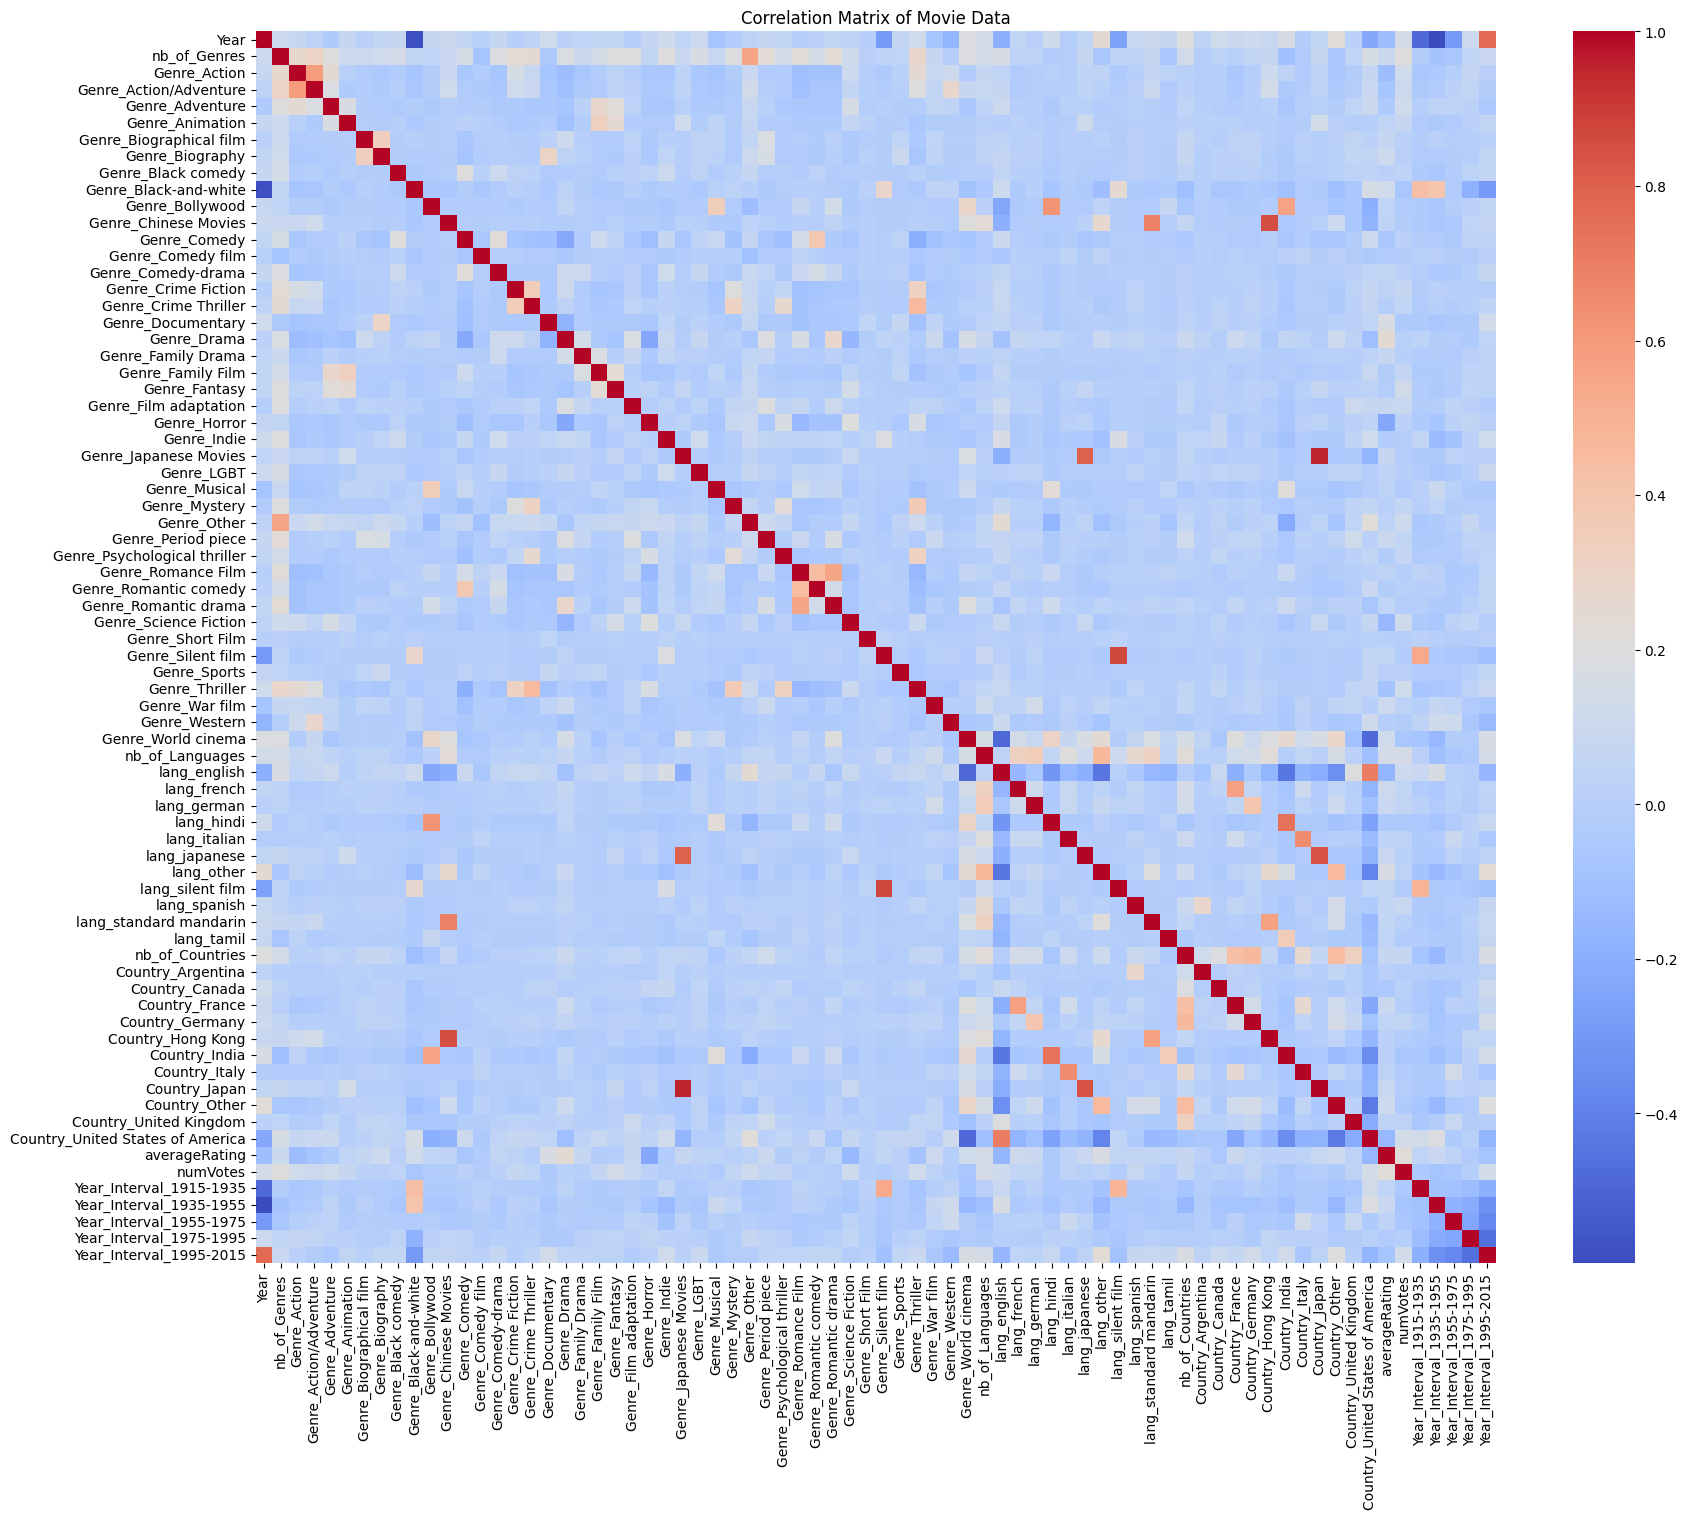

In [21]:
# Perform correlation analysis
correlation_matrix = df_corr_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Movie Data')
plt.show()

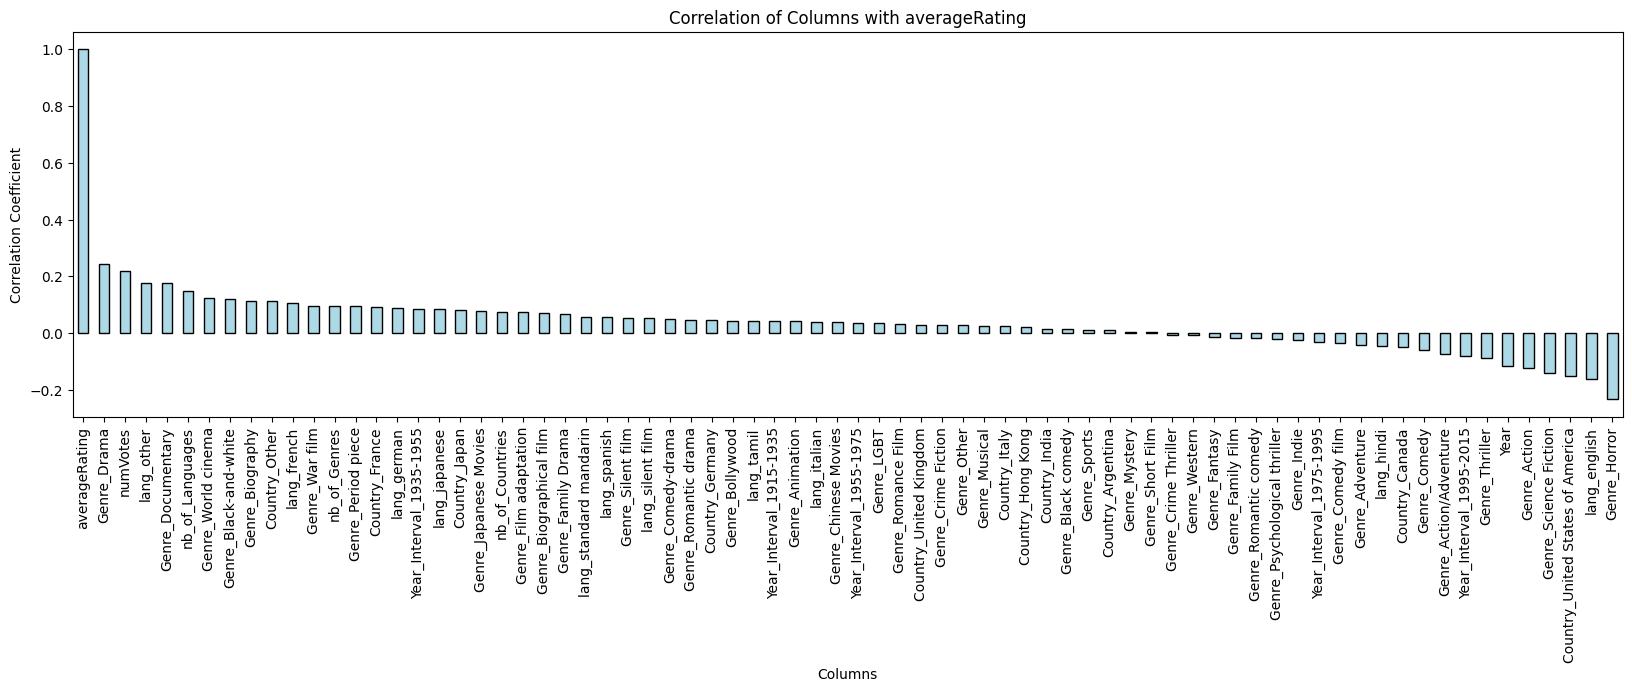

In [26]:
# Calculate the correlation of each column with the target category 'averageRating'
correlation_with_target = correlation_matrix['averageRating'].sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(20, 5))
correlation_with_target.plot(kind='bar', color= 'lightblue', edgecolor='black')
plt.title('Correlation of Columns with averageRating')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

In [27]:
df_ps = movie_data.copy()

In [28]:
df_ps.columns

Index(['Wikipedia_movie_ID', 'Movie_name', 'Movie_box_office_revenue', 'Year',
       'Year_Interval', 'nb_of_Genres', 'Genre_Action',
       'Genre_Action/Adventure', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Biographical film', 'Genre_Biography', 'Genre_Black comedy',
       'Genre_Black-and-white', 'Genre_Bollywood', 'Genre_Chinese Movies',
       'Genre_Comedy', 'Genre_Comedy film', 'Genre_Comedy-drama',
       'Genre_Crime Fiction', 'Genre_Crime Thriller', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family Drama', 'Genre_Family Film',
       'Genre_Fantasy', 'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War

In [30]:
from psmpy import PsmPy
from psmpy.functions import cohenD

# Step 1: Create the treatment variable (e.g., highly localized movies)
df_ps['highly_localized'] = (df_ps['nb_of_Languages'] > df_ps['nb_of_Languages'].median()).astype(int)

# Step 2: Define the treatment and outcome variables
treatment = 'highly_localized'
outcome = 'averageRating'

# Step 3: Prepare the dataset for PSM
psm_data = df_ps[['nb_of_Genres', 'nb_of_Languages', 'nb_of_Countries', 'numVotes', treatment, outcome]].dropna()

# Initialize PSM with a unique identifier
psm = PsmPy(psm_data, treatment=treatment, indx='numVotes')  # Using 'numVotes' as a unique identifier

# Step 4: Perform propensity score matching
psm.logistic_ps(balance=True)  # Logistic regression to estimate propensity scores
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=0.05)  # KNN matching

# Step 5: Compare covariate balance before and after matching
psm.plot_match(
    Title='Covariate Balance Before and After Matching',
    Ylabel='Standardized Mean Difference',
    Xlabel='Covariates'
)

# Step 6: Calculate the Average Treatment Effect on the Treated (ATT)
treated_avg_rating = psm.df_matched[psm.df_matched[treatment] == 1][outcome].mean()
control_avg_rating = psm.df_matched[psm.df_matched[treatment] == 0][outcome].mean()

print(f"Average Rating for Highly Localized Movies: {treated_avg_rating}")
print(f"Average Rating for Less Localized Movies: {control_avg_rating}")

# Optional: Visualize effect size
psm.effect_size_plot(title='Effect Size of Matching', save=False)

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/psmpy/psmpy.py:91: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  majority_trunc = majority[0:majority_trunc_len]


KeyError: 0

In [29]:
'''
from psmpy import PsmPy
from psmpy.functions import cohenD

# Create a binary treatment variable: 1 if the movie is localized into multiple languages, 0 otherwise
df_ps['multiple_languages'] = df_ps['Movie_languages_(Freebase_ID:name_tuples)'].apply(lambda x: 1 if isinstance(x, list) else 0)

# Define the treatment and outcome variables
treatment = 'multiple_languages'
outcome = 'averageRating'

# Optional: Set a unique column as the index if necessary (e.g., 'Movie_name')
df_ps.set_index('Movie_name', inplace=True)

# Initialize PsmPy object
psm = PsmPy(df_ps, treatment=treatment)

# Perform propensity score matching
psm.logistic_ps(balance=True)
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=0.05)

# Plot the covariate balance before and after matching
psm.plot_match(Title='Covariate Balance Before and After Matching', 
               Ylabel='Standardized Mean Difference', Xlabel='Covariates')

# Calculate the average treatment effect on the treated (ATT)
psm.effect_size_plot(title='Effect Size of Matching', save=False)

# Compare averageRatings for films localized into multiple languages vs. those with fewer translations
treated_avg_rating = psm.df_matched[psm.df_matched[treatment] == 1][outcome].mean()
control_avg_rating = psm.df_matched[psm.df_matched[treatment] == 0][outcome].mean()

print(f'Average Rating for films localized into multiple languages: {treated_avg_rating}')
print(f'Average Rating for films with fewer translations: {control_avg_rating}')
'''

KeyError: 'Movie_languages_(Freebase_ID:name_tuples)'